In [1]:
import pandas as pd
import numpy as np

In [2]:
from pandas.plotting import autocorrelation_plot

In [3]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [4]:
ZX_df = pd.read_csv('ZX10208_agr.csv')

In [5]:
ZX_df

dates    SKU  price_per_sku  num_purchases
0    2018-04-20  59567         169.19              3
1    2018-04-24  59567         171.71              3
2    2018-04-27  59567         174.04              3
3    2018-04-30  59567            NaN              1
4    2018-05-03  59567         176.38              2
..          ...    ...            ...            ...
254  2019-12-23  82947            NaN              1
255  2019-12-24  82947         195.46              2
256  2019-12-25  82947         195.21              1
257  2019-12-26  82947         193.79              1
258  2019-12-28  82947         194.78              1

[259 rows x 4 columns]

In [5]:
ZX_df['dates'] = pd.to_datetime(ZX_df.dates)

In [6]:
pivot_t = ZX_df.pivot_table(index='dates',columns='SKU', values='price_per_sku')

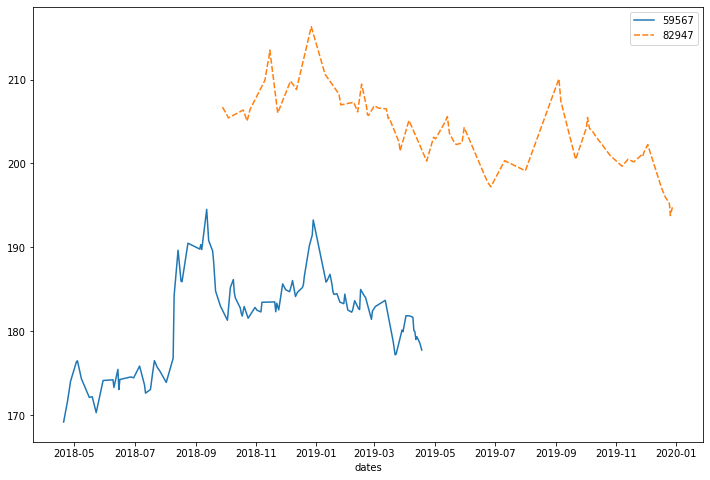

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(data =pivot_t)

In [6]:
ZX_df['price_per_sku'] = ZX_df.groupby('SKU').price_per_sku.ffill()

In [10]:
pivot_t = ZX_df.pivot_table(index='dates',columns='SKU', values='price_per_sku')

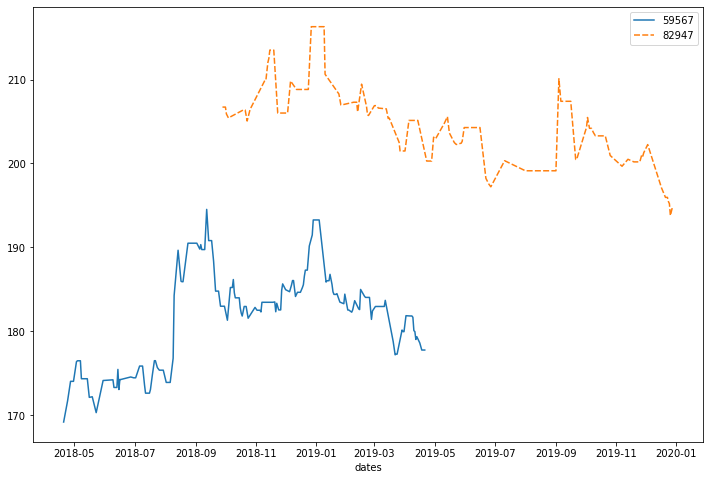

In [11]:
plt.figure(figsize=(12,8))
sns.lineplot(data =pivot_t)

In [8]:
df_59567 = ZX_df[ZX_df.SKU == 59567]

In [9]:
df_59567.dates.describe()

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     156
unique                    156
top       2018-12-21 00:00:00
freq                        1
first     2018-04-20 00:00:00
last      2019-04-21 00:00:00
Name: dates, dtype: object

In [9]:
train_df = df_59567[df_59567.dates <= pd.to_datetime('2019-04-01')]
test_df = df_59567[df_59567.dates > pd.to_datetime('2019-04-01')]

In [11]:
train_df.shape

(145, 4)

In [12]:
test_df.shape

(11, 4)

In [18]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

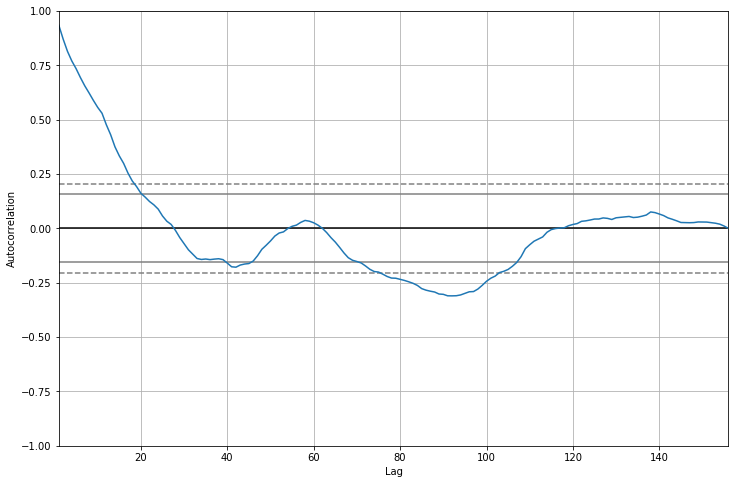

In [19]:
plt.figure(figsize=(12,8))
autocorrelation_plot(df_59567.price_per_sku.values)

In [20]:
#1 Autoregression
AR = AutoReg(train_df.price_per_sku.values, lags=20)
AR_model = AR.fit()

In [21]:
AR_model.params

array([ 1.60820207e+01,  1.06938563e+00, -1.46162089e-01, -1.30899380e-01,
        1.57571721e-01,  6.47218415e-02, -1.11758222e-01,  5.59600227e-02,
       -3.76933446e-02,  1.47311386e-02, -6.18697944e-02,  2.73159049e-01,
       -3.18091136e-01,  1.60588852e-01, -7.09107645e-02, -6.92044450e-02,
        1.41846291e-01, -1.33862976e-01,  4.72945316e-02,  4.09616542e-02,
       -3.34062939e-02])

In [22]:
AR_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1, 
                 dynamic=False)

array([180.44857402, 180.4443652 , 180.87926656, 181.70071796,
       180.70814628, 181.08981343, 181.11552473, 181.10372658,
       182.38490989, 182.0267328 , 182.55686698])

In [23]:
test_df['AR_model_prediction'] = AR_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1, 
                 dynamic=False)

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
test_df

dates    SKU  price_per_sku  num_purchases  AR_model_prediction
192 2019-04-02  59567         181.86              2           180.448574
194 2019-04-06  59567         181.83              2           180.444365
195 2019-04-08  59567         181.83              1           180.879267
196 2019-04-09  59567         181.67              1           181.700718
197 2019-04-10  59567         180.08              2           180.708146
198 2019-04-11  59567         179.97              2           181.089813
199 2019-04-12  59567         179.03              1           181.115525
200 2019-04-13  59567         179.36              1           181.103727
202 2019-04-16  59567         178.61              2           182.384910
203 2019-04-18  59567         177.77              1           182.026733
204 2019-04-21  59567         177.77              1           182.556867

In [45]:
# Moving Avarage
MA = ARIMA(train_df.price_per_sku.values, order=(0,0,20))
MA_model = MA.fit()

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [44]:
MA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([180.53606319, 181.14499876, 181.41489575, 182.55466922,
       181.9822047 , 182.47017115, 182.31006661, 181.64238174,
       182.02806049, 181.34016624, 181.55893436])

In [27]:
test_df['MA_model_prediction'] = MA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
test_df

dates    SKU  price_per_sku  num_purchases  AR_model_prediction  \
192 2019-04-02  59567         181.86              2           180.448574   
194 2019-04-06  59567         181.83              2           180.444365   
195 2019-04-08  59567         181.83              1           180.879267   
196 2019-04-09  59567         181.67              1           181.700718   
197 2019-04-10  59567         180.08              2           180.708146   
198 2019-04-11  59567         179.97              2           181.089813   
199 2019-04-12  59567         179.03              1           181.115525   
200 2019-04-13  59567         179.36              1           181.103727   
202 2019-04-16  59567         178.61              2           182.384910   
203 2019-04-18  59567         177.77              1           182.026733   
204 2019-04-21  59567         177.77              1           182.556867   

     MA_model_prediction  
192           181.141344  
194           180.971612  
195           181.784956  
196           182.459536  
197           181.104239  
198           181.896388  
199           181.058841  
200           181.754725  
202           182.562164  
203           181.310846  
204           182.609678

In [38]:
# Autoregressive moving average(ARMA)
ARMA = ARIMA(train_df.price_per_sku.values, order=(1,0,1))
ARMA_model = ARMA.fit()

In [39]:
ARMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([179.97184905, 179.98234841, 179.99237897, 180.00196167,
       180.0111165 , 180.01986257, 180.02821814, 180.03620062,
       180.04382669, 180.05111226, 180.05807253])

In [31]:
test_df['ARMA_model_prediction'] = ARMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
# Autoregressive Integrated Moving Average
ARIMA_ = ARIMA(train_df.price_per_sku.values, order=(20,1,20))
ARIMA_model = ARIMA_.fit()

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [51]:
ARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([180.03640121, 180.10816036, 180.17555951, 180.23886357,
       180.29832135, 180.35416654, 180.40661865, 180.45588382,
       180.5021557 , 180.54561615, 180.586436  ])

In [69]:
test_df['ARIMA_model_prediction'] = ARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
test_df

dates    SKU  price_per_sku  num_purchases  AR_model_prediction  \
192 2019-04-02  59567         181.86              2           180.448574   
194 2019-04-06  59567         181.83              2           180.444365   
195 2019-04-08  59567         181.83              1           180.879267   
196 2019-04-09  59567         181.67              1           181.700718   
197 2019-04-10  59567         180.08              2           180.708146   
198 2019-04-11  59567         179.97              2           181.089813   
199 2019-04-12  59567         179.03              1           181.115525   
200 2019-04-13  59567         179.36              1           181.103727   
202 2019-04-16  59567         178.61              2           182.384910   
203 2019-04-18  59567         177.77              1           182.026733   
204 2019-04-21  59567         177.77              1           182.556867   

     MA_model_prediction  ARMA_model_prediction  ARIMA_model_prediction  
192           181.141344             180.710981              180.036401  
194           180.971612             180.616855              180.108160  
195           181.784956             180.377470              180.175560  
196           182.459536             181.147074              180.238864  
197           181.104239             178.487079              180.298321  
198           181.896388             179.365294              180.354167  
199           181.058841             178.331751              180.406619  
200           181.754725             178.413759              180.455884  
202           182.562164             180.189759              180.502156  
203           181.310846             179.350564              180.545616  
204           182.609678             180.896032              180.586436

In [54]:
# Seasonal Autoregressive Integrated Moving-Average 
SARIMA = SARIMAX(train_df.price_per_sku.values, order=(20,1,20), seasonal= (0,0,0,0))
SARIMA_model = SARIMA.fit()

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [55]:
SARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([180.83348221, 180.48046756, 180.31703176, 181.11388551,
       178.70003908, 179.14214423, 177.75482661, 177.77942526,
       179.95119152, 178.97000545, 180.37461838])

In [56]:
test_df['SARIMA_model_prediction'] = SARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
test_df

dates    SKU  price_per_sku  num_purchases  AR_model_prediction  \
192 2019-04-02  59567         181.86              2           180.448574   
194 2019-04-06  59567         181.83              2           180.444365   
195 2019-04-08  59567         181.83              1           180.879267   
196 2019-04-09  59567         181.67              1           181.700718   
197 2019-04-10  59567         180.08              2           180.708146   
198 2019-04-11  59567         179.97              2           181.089813   
199 2019-04-12  59567         179.03              1           181.115525   
200 2019-04-13  59567         179.36              1           181.103727   
202 2019-04-16  59567         178.61              2           182.384910   
203 2019-04-18  59567         177.77              1           182.026733   
204 2019-04-21  59567         177.77              1           182.556867   

     MA_model_prediction  ARMA_model_prediction  ARIMA_model_prediction  \
192           181.141344             180.710981              180.036401   
194           180.971612             180.616855              180.108160   
195           181.784956             180.377470              180.175560   
196           182.459536             181.147074              180.238864   
197           181.104239             178.487079              180.298321   
198           181.896388             179.365294              180.354167   
199           181.058841             178.331751              180.406619   
200           181.754725             178.413759              180.455884   
202           182.562164             180.189759              180.502156   
203           181.310846             179.350564              180.545616   
204           182.609678             180.896032              180.586436   

     SARIMA_model_prediction  
192               180.833482  
194               180.480468  
195               180.317032  
196               181.113886  
197               178.700039  
198               179.142144  
199               177.754827  
200               177.779425  
202               179.951192  
203               178.970005  
204               180.374618

In [58]:
# Simple Exponential Smoothing
SES = SimpleExpSmoothing(train_df.price_per_sku.values)
SES_model = SES.fit()

In [59]:
SES_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([179.96, 179.96, 179.96, 179.96, 179.96, 179.96, 179.96, 179.96,
       179.96, 179.96, 179.96])

In [60]:
test_df['SES_model_prediction'] = SES_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
test_df

dates    SKU  price_per_sku  num_purchases  AR_model_prediction  \
192 2019-04-02  59567         181.86              2           180.448574   
194 2019-04-06  59567         181.83              2           180.444365   
195 2019-04-08  59567         181.83              1           180.879267   
196 2019-04-09  59567         181.67              1           181.700718   
197 2019-04-10  59567         180.08              2           180.708146   
198 2019-04-11  59567         179.97              2           181.089813   
199 2019-04-12  59567         179.03              1           181.115525   
200 2019-04-13  59567         179.36              1           181.103727   
202 2019-04-16  59567         178.61              2           182.384910   
203 2019-04-18  59567         177.77              1           182.026733   
204 2019-04-21  59567         177.77              1           182.556867   

     MA_model_prediction  ARMA_model_prediction  ARIMA_model_prediction  \
192           181.141344             180.710981              180.036401   
194           180.971612             180.616855              180.108160   
195           181.784956             180.377470              180.175560   
196           182.459536             181.147074              180.238864   
197           181.104239             178.487079              180.298321   
198           181.896388             179.365294              180.354167   
199           181.058841             178.331751              180.406619   
200           181.754725             178.413759              180.455884   
202           182.562164             180.189759              180.502156   
203           181.310846             179.350564              180.545616   
204           182.609678             180.896032              180.586436   

     SARIMA_model_prediction  SES_model_prediction  
192               180.833482                179.96  
194               180.480468                179.96  
195               180.317032                179.96  
196               181.113886                179.96  
197               178.700039                179.96  
198               179.142144                179.96  
199               177.754827                179.96  
200               177.779425                179.96  
202               179.951192                179.96  
203               178.970005                179.96  
204               180.374618                179.96

NameError: name 'train_df' is not defined

In [ ]:
# VAR
# VARMA
# VARMAX

In [14]:
! pip install torchvision

In [15]:
import torch
from torch import nn
from torch.autograd import Variable as V
from torch import optim
import torchvision as tv
import torchvision.transforms as tf

In [17]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [18]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_df.price_per_sku.values .reshape(-1, 1))

In [20]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [21]:
train_data_normalized

tensor([-1.0000, -0.8011, -0.6172, -0.6172, -0.4325, -0.4238, -0.4238, -0.4238,
        -0.5927, -0.5927, -0.5927, -0.7680, -0.7624, -0.9116, -0.6093, -0.6030,
        -0.6748, -0.6748, -0.5051, -0.6946, -0.5998, -0.5998, -0.5762, -0.5841,
        -0.5841, -0.4736, -0.4736, -0.6527, -0.7285, -0.7285, -0.6938, -0.5525,
        -0.4230, -0.4230, -0.4878, -0.5122, -0.5122, -0.5122, -0.6275, -0.6275,
        -0.4002,  0.1902,  0.6156,  0.3236,  0.3197,  0.3197,  0.6819,  0.6819,
         0.6267,  0.6685,  0.6219,  0.6219,  0.6219,  1.0000,  0.7064,  0.7064,
         0.6093,  0.5122,  0.2313,  0.2313,  0.2313,  0.0892,  0.0892, -0.0426,
         0.2652,  0.2652,  0.3402,  0.2163,  0.1681,  0.1681,  0.0734,  0.0245,
        -0.0032,  0.0868,  0.0868, -0.0237,  0.0781,  0.0513,  0.0513,  0.0355,
         0.1263,  0.1263,  0.1263,  0.1294,  0.0371,  0.1168,  0.0545,  0.0545,
         0.0545,  0.2391,  0.2991,  0.2447,  0.2257,  0.2897,  0.3307,  0.3307,
         0.1807,  0.2202,  0.2202,  0.26

In [23]:
def create_inout_sequences(input_data, tw=11):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [24]:
train_inout_seq = create_inout_sequences(train_data_normalized, tw=11)

In [18]:
train_inout_seq

[(tensor([-1.0000, -0.8011, -0.6172, -0.6172, -0.4325, -0.4238, -0.4238, -0.4238,
          -0.5927, -0.5927, -0.5927]),
  tensor([-0.7680])),
 (tensor([-0.8011, -0.6172, -0.6172, -0.4325, -0.4238, -0.4238, -0.4238, -0.5927,
          -0.5927, -0.5927, -0.7680]),
  tensor([-0.7624])),
 (tensor([-0.6172, -0.6172, -0.4325, -0.4238, -0.4238, -0.4238, -0.5927, -0.5927,
          -0.5927, -0.7680, -0.7624]),
  tensor([-0.9116])),
 (tensor([-0.6172, -0.4325, -0.4238, -0.4238, -0.4238, -0.5927, -0.5927, -0.5927,
          -0.7680, -0.7624, -0.9116]),
  tensor([-0.6093])),
 (tensor([-0.4325, -0.4238, -0.4238, -0.4238, -0.5927, -0.5927, -0.5927, -0.7680,
          -0.7624, -0.9116, -0.6093]),
  tensor([-0.6030])),
 (tensor([-0.4238, -0.4238, -0.4238, -0.5927, -0.5927, -0.5927, -0.7680, -0.7624,
          -0.9116, -0.6093, -0.6030]),
  tensor([-0.6748])),
 (tensor([-0.4238, -0.4238, -0.5927, -0.5927, -0.5927, -0.7680, -0.7624, -0.9116,
          -0.6093, -0.6030, -0.6748]),
  tensor([-0.6748])),

In [25]:
epochs = 80

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%10 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.01963286
epoch:  11 loss: 0.00294601
epoch:  21 loss: 0.00068965
epoch:  31 loss: 0.00001314
epoch:  41 loss: 0.00001977
epoch:  51 loss: 0.00000696
epoch:  61 loss: 0.00000034
epoch:  71 loss: 0.00113138
epoch:  79 loss: 0.0009130306


In [26]:
test_inputs = train_data_normalized[-11:].tolist()

In [27]:
model.eval()

for i in range(11):
    seq = torch.FloatTensor(test_inputs[-11:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [28]:
test_inputs[11:]

[-0.1597515344619751,
 -0.14000685513019562,
 -0.14336520433425903,
 -0.1471385657787323,
 -0.14595310389995575,
 -0.13806748390197754,
 -0.12750659883022308,
 -0.11945057660341263,
 -0.11531810462474823,
 -0.1131543442606926,
 -0.11191669851541519]

In [29]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[11:] ).reshape(-1, 1))
print(actual_predictions)

[[179.83594806]
 [180.08611315]
 [180.04356286]
 [179.99575437]
 [180.01077417]
 [180.11068498]
 [180.24449139]
 [180.34656119]
 [180.39891961]
 [180.42633446]
 [180.44201543]]


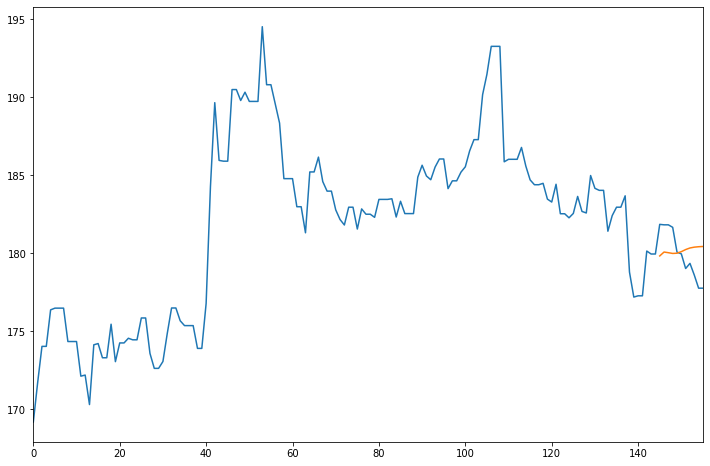

In [30]:
plt.figure(figsize=(12,8))
x = np.arange(145, 156, 1)
plt.autoscale(axis='x', tight=True)
plt.plot(df_59567.price_per_sku.values)
plt.plot(x,actual_predictions)
plt.show()

<img src = https://miro.medium.com/max/1131/0*ufWnnvTA9AkjKrfI>

In [67]:
# Autoregressive Integrated Moving Average with boundaries
ARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)


array([180.83348221, 180.48046756, 180.31703176, 181.11388551,
       178.70003908, 179.14214423, 177.75482661, 177.77942526,
       179.95119152, 178.97000545, 180.37461838])

In [68]:
ARIMA_model.get_forecast(11).conf_int(0.05)

array([[178.06782628, 183.59913814],
       [176.30886836, 184.65206675],
       [175.10077559, 185.53328794],
       [175.31448936, 186.91328165],
       [172.32181619, 185.07826196],
       [172.21648038, 186.06780808],
       [170.32541732, 185.18423589],
       [169.88163102, 185.67721951],
       [171.57015036, 188.33223267],
       [170.10741926, 187.83259163],
       [171.10699599, 189.64224077]])

In [87]:
test_df['ARIMA_low_boundary'] = ARIMA_model.get_forecast(11).conf_int(0.05)[:,0]
test_df['ARIMA_high_boundary'] = ARIMA_model.get_forecast(11).conf_int(0.05)[:,1]

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
test_df.columns

Index(['dates', 'SKU', 'price_per_sku', 'num_purchases', 'AR_model_prediction',
       'MA_model_prediction', 'ARMA_model_prediction',
       'ARIMA_model_prediction', 'SARIMA_model_prediction',
       'SES_model_prediction', 'ARIMA_low_boundary', 'ARIMA_high_boundary'],
      dtype='object')

In [101]:
col_list = ['dates','price_per_sku','AR_model_prediction',
       'MA_model_prediction', 'ARMA_model_prediction',
       'ARIMA_model_prediction', 'SARIMA_model_prediction',
       'SES_model_prediction', 'ARIMA_low_boundary', 'ARIMA_high_boundary']

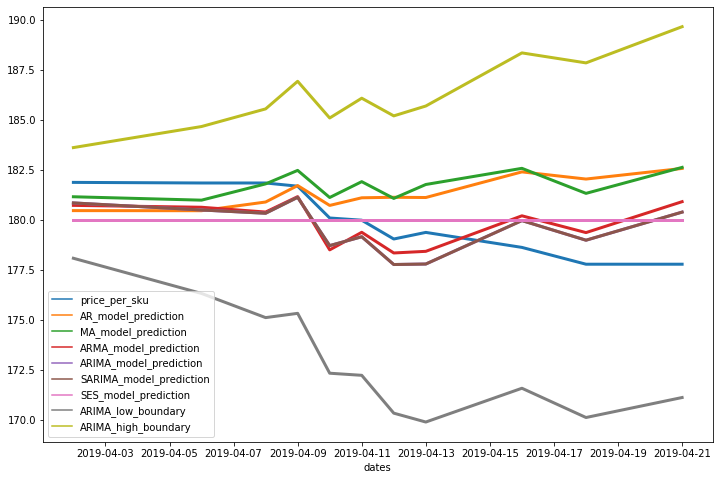

In [102]:
plt.figure(figsize=(12,8))
sns.lineplot(data=test_df[col_list].set_index('dates'), dashes=False,linewidth = 3)

In [111]:
pred_columns = ['AR_model_prediction',
       'MA_model_prediction', 'ARMA_model_prediction',
       'ARIMA_model_prediction', 'SARIMA_model_prediction',
       'SES_model_prediction']

In [112]:
test_df['mean_predicted_price'] = test_df[pred_columns].mean(axis=1)

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
from sklearn.model_selection import TimeSeriesSplit

In [115]:
tss = TimeSeriesSplit(n_splits = 12)


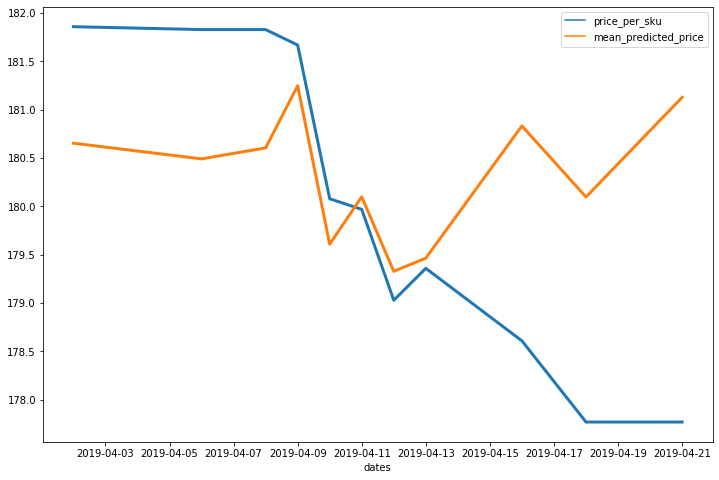

In [113]:
plt.figure(figsize=(12,8))
sns.lineplot(data=test_df[['dates', 'price_per_sku', 'mean_predicted_price']].set_index('dates'), dashes=False,linewidth = 3)

In [116]:
from fbprophet import Prophet

In [117]:
prophet = Prophet()

In [118]:
prophet.fit(train_df[['dates', 'price_per_sku']].rename(columns={'dates':'ds','price_per_sku':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [119]:
pred_df = prophet.predict(test_df[['dates']].rename(columns={'dates':'ds'}))

In [120]:
pred_df

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2019-04-02  178.633746  176.271134  181.766508   178.633746   178.633746   
1  2019-04-06  178.245861  175.740054  181.125956   178.163647   178.315983   
2  2019-04-08  178.051918  174.995343  180.619580   177.869588   178.200631   
3  2019-04-09  177.954947  175.688949  180.744188   177.721026   178.148887   
4  2019-04-10  177.857975  174.732653  180.143196   177.567031   178.108059   
5  2019-04-11  177.761004  174.514339  179.972306   177.405210   178.076767   
6  2019-04-12  177.664033  175.779706  181.130611   177.242305   178.045224   
7  2019-04-13  177.567061  175.036760  180.399289   177.066251   178.000467   
8  2019-04-16  177.276147  174.719525  180.185900   176.584335   177.896250   
9  2019-04-18  177.082205  174.076816  179.413327   176.246607   177.854536   
10 2019-04-21  176.791291  173.744857  179.425171   175.723565   177.799971   

    additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         0.348957              0.348957              0.348957  0.348957   
1         0.135763              0.135763              0.135763  0.135763   
2        -0.198890             -0.198890             -0.198890 -0.198890   
3         0.348957              0.348957              0.348957  0.348957   
4        -0.445631             -0.445631             -0.445631 -0.445631   
5        -0.393023             -0.393023             -0.393023 -0.393023   
6         0.771600              0.771600              0.771600  0.771600   
7         0.135763              0.135763              0.135763  0.135763   
8         0.348957              0.348957              0.348957  0.348957   
9        -0.393023             -0.393023             -0.393023 -0.393023   
10       -0.218775             -0.218775             -0.218775 -0.218775   

    weekly_lower  weekly_upper  multiplicative_terms  \
0       0.348957      0.348957                   0.0   
1       0.135763      0.135763                   0.0   
2      -0.198890     -0.198890                   0.0   
3       0.348957      0.348957                   0.0   
4      -0.445631     -0.445631                   0.0   
5      -0.393023     -0.393023                   0.0   
6       0.771600      0.771600                   0.0   
7       0.135763      0.135763                   0.0   
8       0.348957      0.348957                   0.0   
9      -0.393023     -0.393023                   0.0   
10     -0.218775     -0.218775                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                          0.0                         0.0  178.982703  
1                          0.0                         0.0  178.381623  
2                          0.0                         0.0  177.853028  
3                          0.0                         0.0  178.303904  
4                          0.0                         0.0  177.412344  
5                          0.0                         0.0  177.367981  
6                          0.0                         0.0  178.435632  
7                          0.0                         0.0  177.702824  
8                          0.0                         0.0  177.625104  
9                          0.0                         0.0  176.689182  
10                         0.0                         0.0  176.572516

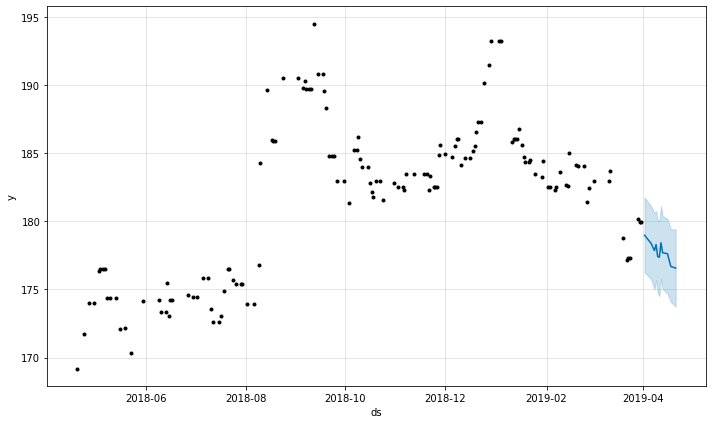

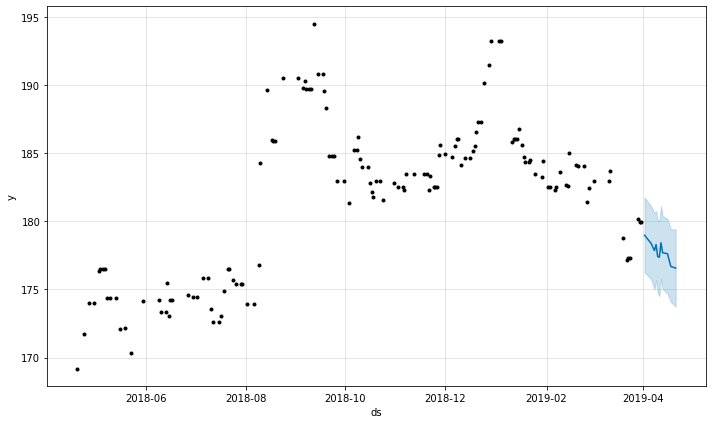

In [121]:
prophet.plot(pred_df)

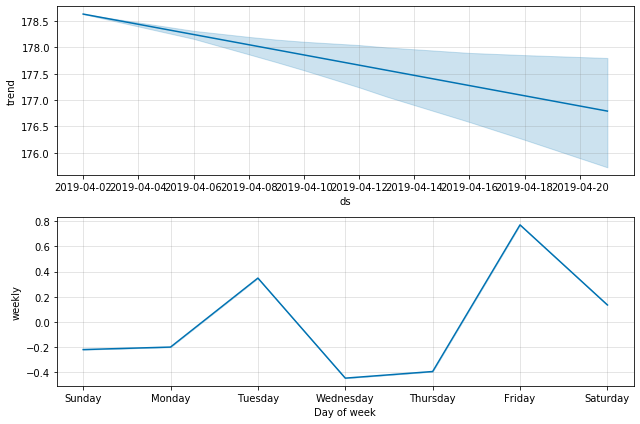

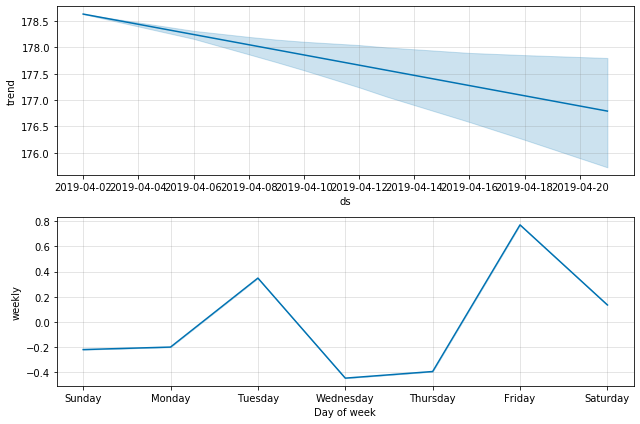

In [122]:
prophet.plot_components(pred_df)

In [133]:
test_df['prophet_model_prediction'] = pred_df['yhat'].values

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


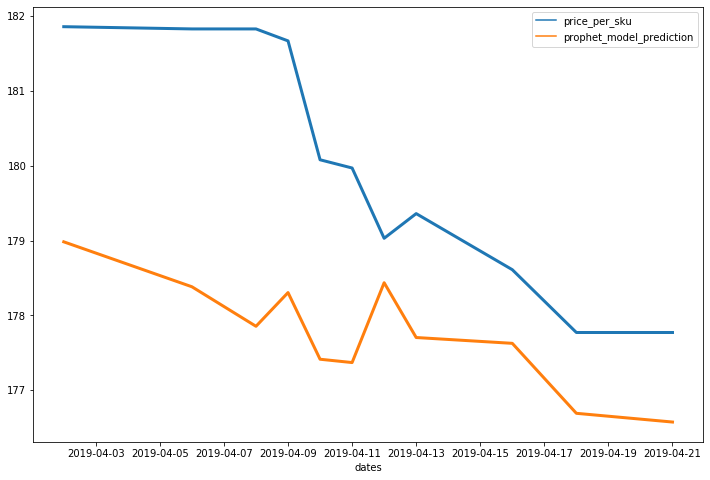

In [134]:
plt.figure(figsize=(12,8))
sns.lineplot(data=test_df[['dates', 'price_per_sku', 'prophet_model_prediction']].set_index('dates'), 
             dashes=False, linewidth = 3)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
GBR = GradientBoostingRegressor()

In [65]:
from xgboost.sklearn import XGBRegressor
from functools import partial

Quantile:
$$C(x) = \left\{\begin{array}{cc}(\alpha-1)|x-q| & \mbox{if }x<q \\ \alpha|x-q| & \mbox{if }x\geq q \end{array}\right. $$

Split condition:

$$\mathcal{L}_{\mbox{ split}} = \frac{\left(\sum\limits_{i \in I_L}g_j \right)^2}{\sum\limits_{i \in I_L}h_j+\lambda}+\frac{\left(\sum\limits_{i \in I_R}g_j\right)^2}{\sum\limits_{i \in I_R}h_j+\lambda}-\frac{\left(\sum\limits_{i \in I}g_j\right)^2}{\sum\limits_{i \in I}h_j+\lambda}~~~~\mbox{for } I_{L} \cup I_{R} = I $$

In [45]:
#@title XGBQuantile Class
class XGBQuantile(XGBRegressor):
    def __init__(self,quant_alpha=0.95,quant_delta = 1.0,quant_thres=1.0,quant_var =1.0,base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='reg:linear', random_state=0,reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,silent=True, subsample=1):
        self.quant_alpha = quant_alpha
        self.quant_delta = quant_delta
        self.quant_thres = quant_thres
        self.quant_var = quant_var
    
        super().__init__(base_score=base_score, booster=booster, colsample_bylevel=colsample_bylevel,
           colsample_bytree=colsample_bytree, gamma=gamma, learning_rate=learning_rate, max_delta_step=max_delta_step,
           max_depth=max_depth, min_child_weight=min_child_weight, missing=missing, n_estimators=n_estimators,
           n_jobs= n_jobs, nthread=nthread, objective=objective, random_state=random_state,
           reg_alpha=reg_alpha, reg_lambda=reg_lambda, scale_pos_weight=scale_pos_weight, seed=seed,
           silent=silent, subsample=subsample)

        self.test = None
  
    def fit(self, X, y):
        super().set_params(objective=partial(XGBQuantile.quantile_loss,alpha = self.quant_alpha,delta = self.quant_delta,threshold = self.quant_thres,var = self.quant_var) )
        super().fit(X,y)
        return self
  
    def predict(self,X):
        return super().predict(X)
  
    def score(self, X, y):
        y_pred = super().predict(X)
        score = XGBQuantile.quantile_score(y, y_pred, self.quant_alpha)
        score = 1./score
        return score
      
    @staticmethod
    def quantile_loss(y_true,y_pred,alpha,delta,threshold,var):
        x = y_true - y_pred
        grad = (x<(alpha-1.0)*delta)*(1.0-alpha)-  ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )*x/delta-alpha*(x>alpha*delta)
        hess = ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )/delta 

        grad = (np.abs(x)<threshold )*grad - (np.abs(x)>=threshold )*(2*np.random.randint(2, size=len(y_true)) -1.0)*var
        hess = (np.abs(x)<threshold )*hess + (np.abs(x)>=threshold )
        return grad, hess
  
    @staticmethod
    def original_quantile_loss(y_true,y_pred,alpha,delta):
        x = y_true - y_pred
        grad = (x<(alpha-1.0)*delta)*(1.0-alpha)-((x>=(alpha-1.0)*delta)& (x<alpha*delta) )*x/delta-alpha*(x>alpha*delta)
        hess = ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )/delta 
        return grad,hess

  
    @staticmethod
    def quantile_score(y_true, y_pred, alpha):
        score = XGBQuantile.quantile_cost(x=y_true-y_pred,alpha=alpha)
        score = np.sum(score)
        return score
  
    @staticmethod
    def quantile_cost(x, alpha):
        return (alpha-1.0)*x*(x<0)+alpha*x*(x>=0)
  
    @staticmethod
    def get_split_gain(gradient,hessian,l=1):
        split_gain = list()
        for i in range(gradient.shape[0]):
            split_gain.append(np.sum(gradient[:i])**2/(np.sum(hessian[:i])+l)+np.sum(gradient[i:])**2/(np.sum(hessian[i:])+l)-np.sum(gradient)**2/(np.sum(hessian)+l) )
    
        return np.array(split_gain)
